In [2]:
"""
#how to read edf file into a csv:
import numpy as np
import mne
edf = mne.io.read_raw_edf('/Users/jonathan.williams/Desktop/Desktop-s-will511/VAIL_AI/VAIL_AI_Code/Driver_Drowsiness/Sleeep_Data_Source/learn-nsrr01.edf')
header = 'ECG' #','.join(edf.ch_names)
np.savetxt('sleep_dataset_1.csv', edf.get_data(header).T, header=header)
"""

Extracting EDF parameters from /Users/jonathan.williams/Desktop/Desktop-s-will511/VAIL_AI/VAIL_AI_Code/Driver_Drowsiness/Sleeep_Data_Source/learn-nsrr01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
#creating a dataframe from the csv file
import pandas as pd
ecg_df_1 = pd.read_csv('sleep_dataset_1.csv')
ecg_df_1.head()

,# ECG
0,0.000025
1,0.000034
2,0.000034
3,0.000034
4,0.000044


In [6]:
#converting lab tech profusion readings (hypnograph readings) into a dataframe:
import xml.etree.ElementTree as ET
import pandas as pd

xml_data = open('sleep_dataset_1_profusions.xml', 'r').read()  # Read file
root = ET.XML(xml_data)  # Parse XML

data = []
cols = []
for i, child in enumerate(root):
    data.append([subchild.text for subchild in child])
    cols.append(child.tag)

hypno_df = pd.DataFrame(data).T  # Write in DF and transpose it
hypno_df.columns = cols  # Update column names

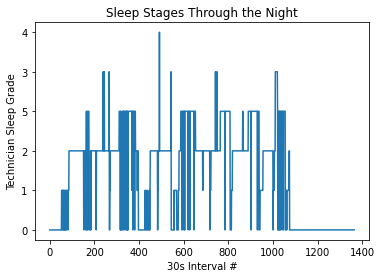

In [39]:
#plotting sleep stages the night
import numpy as np
import matplotlib.pyplot as plt
sleep_stages = hypno_df.SleepStages
plt.plot(np.arange(1,len(sleep_stages)+1),sleep_stages)
plt.title('Sleep Stages Through the Night')
plt.xlabel('30s Interval #')
plt.ylabel('Technician Sleep Grade')
plt.show()

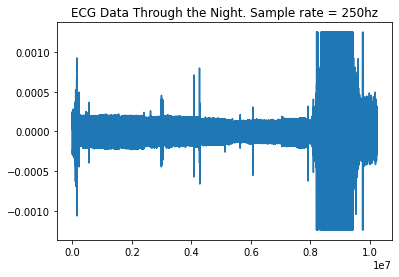

In [40]:
#plotting ECG data
ecg_time_series = ecg_df_1['# ECG']
plt.plot(np.arange(1,len(ecg_time_series)+1),ecg_time_series)
plt.title('ECG Data Through the Night. Sample rate = 250hz')
plt.show()

In [41]:
"""
Data Notes:
    1. ECG/Sleep data was recorded over 11 hours and 22 mins (11.3667 hours)
    2. Sleep Grade Marked every 30 seconds (window = 30s)
    3. ECG sampled 250 times/second (250hz?)
"""
#converting ecg/sleep grade time series into np arrays
sleep_stages = np.array(sleep_stages)
ecg_time_series = np.array(ecg_time_series)
#parsing ecg data into 30s intervals (7500 pairs between ecg data and sleep grade)
macro_ecg_time_series = np.array(np.split(ecg_time_series,len(sleep_stages)))

<ipython-input-34-c874925fa712>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


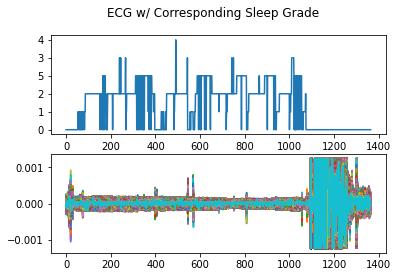

In [34]:
#plotting sleep stage vs. ecg reading overall
fig, axs = plt.subplots(2)
fig.suptitle('ECG w/ Corresponding Sleep Grade')
axs[0].plot(np.arange(len(sleep_stages)), sleep_stages)
axs[1].plot(np.arange(len(sleep_stages)), macro_ecg_time_series)
fig.show()

In [71]:
#calculating RR peak interval from ECG data:
import heartpy as hy
ecg_processed = hy.process(ecg_time_series,sample_rate=250,windowsize=30)

#TO DO: 1) filter/rescale raw ecg data so that we can use heartpy methods for RRI calculation
"""
TO DP:
1) Filter/rescale raw ecg data so that we can use heartpy methods for RRI calculation.
2) create the recurrence plot for each 30s ECG intervals
3) transform sleep grades to binary 0 awake and 1 sleep
4) feed 7500 RP images into a CNN
"""

KeyboardInterrupt: 